# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto aysen
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | richards bay
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | urumqi
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | saipan
Processing Record 12 of Set 1 | belyy yar
Processing Record 13 of Set 1 | toropets
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | fukuecho
Processing Record 17 of Set 1 | san miguel
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | kolonia town
Processing 

Processing Record 37 of Set 4 | la tuque
Processing Record 38 of Set 4 | papao
Processing Record 39 of Set 4 | lib
Processing Record 40 of Set 4 | remire-montjoly
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | ayorou
Processing Record 43 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 44 of Set 4 | kijang
Processing Record 45 of Set 4 | saynshand
Processing Record 46 of Set 4 | ilha de mocambique
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | selfoss
Processing Record 49 of Set 4 | mejit
Processing Record 0 of Set 5 | tamiahua
Processing Record 1 of Set 5 | whyalla stuart
City not found. Skipping...
Processing Record 2 of Set 5 | mahajanga
Processing Record 3 of Set 5 | qarauyl
Processing Record 4 of Set 5 | igra
Processing Record 5 of Set 5 | tshabong
Processing Record 6 of Set 5 | limon
Processing Record 7 of Set 5 | boa vista
Processing Record 8 of Set 5 | siwa oasis
Processing Record 9 of Set 5 | shilka
Processi

Processing Record 28 of Set 8 | murbad
Processing Record 29 of Set 8 | la leonesa
Processing Record 30 of Set 8 | roma
Processing Record 31 of Set 8 | beinamar
Processing Record 32 of Set 8 | xiangyang
Processing Record 33 of Set 8 | buka
Processing Record 34 of Set 8 | san julian
Processing Record 35 of Set 8 | torghay
Processing Record 36 of Set 8 | porto novo
Processing Record 37 of Set 8 | port saint john's
Processing Record 38 of Set 8 | santo augusto
Processing Record 39 of Set 8 | qusmuryn
Processing Record 40 of Set 8 | sa kaeo
Processing Record 41 of Set 8 | karakol
Processing Record 42 of Set 8 | mont-de-marsan
Processing Record 43 of Set 8 | boali
Processing Record 44 of Set 8 | hovd
Processing Record 45 of Set 8 | pont rouge
Processing Record 46 of Set 8 | cururupu
Processing Record 47 of Set 8 | chulakkurgan
Processing Record 48 of Set 8 | dongxing
Processing Record 49 of Set 8 | n'dalatando
Processing Record 0 of Set 9 | balsas
Processing Record 1 of Set 9 | ceeldheer
Pro

Processing Record 21 of Set 12 | suphan buri
Processing Record 22 of Set 12 | roxas
Processing Record 23 of Set 12 | viedma
Processing Record 24 of Set 12 | fort st. john
Processing Record 25 of Set 12 | ad dilam
Processing Record 26 of Set 12 | galesong
Processing Record 27 of Set 12 | key largo
Processing Record 28 of Set 12 | lebork
Processing Record 29 of Set 12 | perry
Processing Record 30 of Set 12 | baixa grande
Processing Record 31 of Set 12 | salekhard
Processing Record 32 of Set 12 | amga
Processing Record 33 of Set 12 | monteagudo
Processing Record 34 of Set 12 | baissa
Processing Record 35 of Set 12 | nadym
Processing Record 36 of Set 12 | greenville
Processing Record 37 of Set 12 | bonthe
Processing Record 38 of Set 12 | acapulco de juarez
Processing Record 39 of Set 12 | siguiri
Processing Record 40 of Set 12 | gunnison
Processing Record 41 of Set 12 | alotau
City not found. Skipping...
Processing Record 42 of Set 12 | tonj
Processing Record 43 of Set 12 | kalengwa
Proces

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto aysen,-45.4000,-72.7000,12.51,99,100,1.82,CL,1681956406
1,alofi,-19.0595,-169.9187,27.94,83,75,4.12,NU,1681956150
2,richards bay,-28.7830,32.0377,19.00,87,0,5.62,ZA,1681956406
3,ushuaia,-54.8000,-68.3000,1.09,96,69,2.03,AR,1681956407
4,urumqi,43.8010,87.6005,5.53,42,0,1.00,CN,1681956407


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto aysen,-45.4000,-72.7000,12.51,99,100,1.82,CL,1681956406
1,alofi,-19.0595,-169.9187,27.94,83,75,4.12,NU,1681956150
2,richards bay,-28.7830,32.0377,19.00,87,0,5.62,ZA,1681956406
3,ushuaia,-54.8000,-68.3000,1.09,96,69,2.03,AR,1681956407
4,urumqi,43.8010,87.6005,5.53,42,0,1.00,CN,1681956407


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

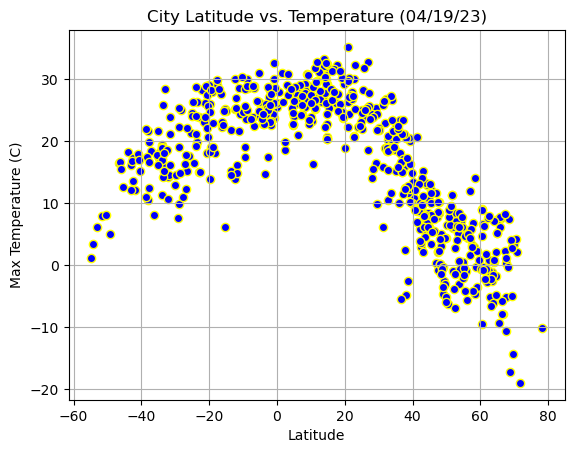

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="yellow",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

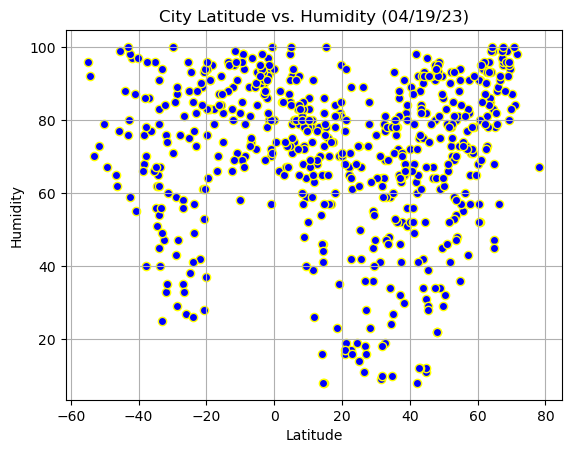

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="yellow",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

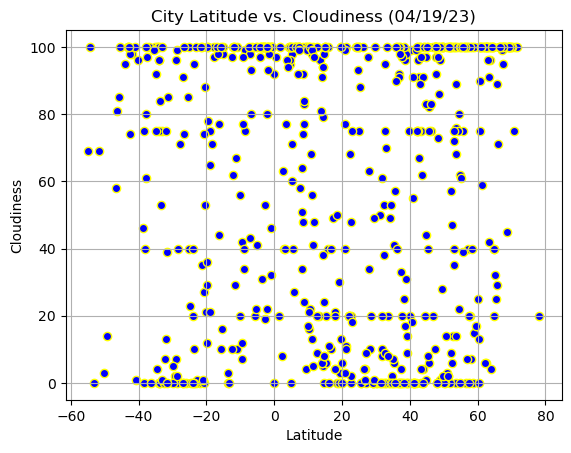

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="yellow",facecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

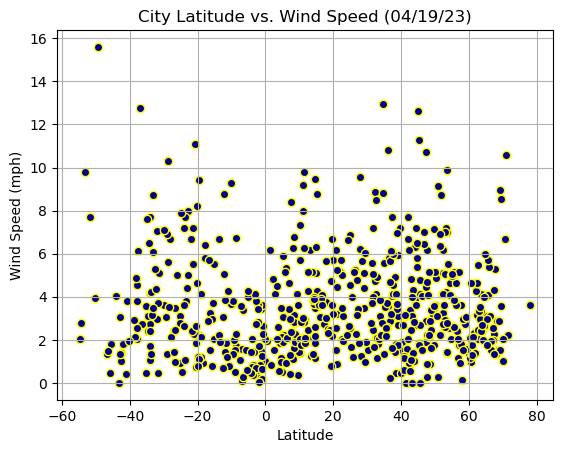

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="yellow",facecolors="darkblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values, coorinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

    plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="yellow")
    plt.plot(x_values,regress_values,"g-")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (c)')

    print(f"The r-value is: {rvalue}")
    plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,urumqi,43.8010,87.6005,5.53,42,0,1.00,CN,1681956407
7,thompson,55.7435,-97.8558,-0.91,55,75,5.14,CA,1681956137
9,olonkinbyen,70.9221,-8.7187,2.18,84,100,10.58,SJ,1681956408
10,saipan,15.1355,145.7010,31.39,100,20,8.75,MP,1681956169
11,belyy yar,53.6039,91.3903,-3.06,54,0,7.00,RU,1681956408


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto aysen,-45.4000,-72.7000,12.51,99,100,1.82,CL,1681956406
1,alofi,-19.0595,-169.9187,27.94,83,75,4.12,NU,1681956150
2,richards bay,-28.7830,32.0377,19.00,87,0,5.62,ZA,1681956406
3,ushuaia,-54.8000,-68.3000,1.09,96,69,2.03,AR,1681956407
5,margaret river,-33.9500,115.0667,19.36,45,0,4.18,AU,1681956407


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8820463320527978


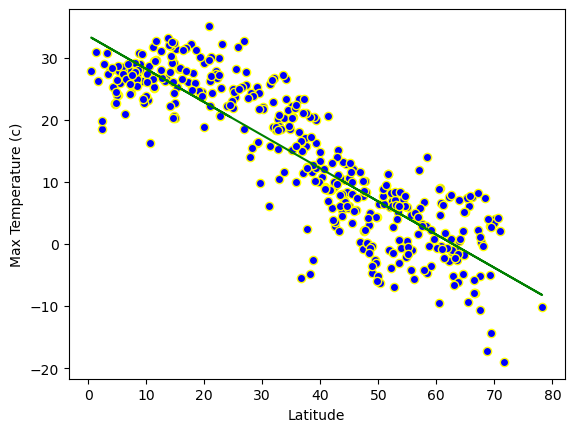

In [67]:
# Linear regression on Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Max Temp"]
linear_reg(x_value, y_value, (13,9))

The r-value is: 0.6803037455056161


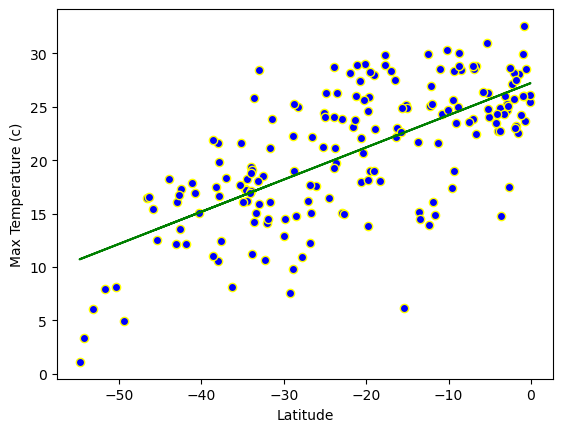

In [68]:
# Linear regression on Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Max Temp"]
linear_reg(x_value, y_value, (-30,9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17529324014424655


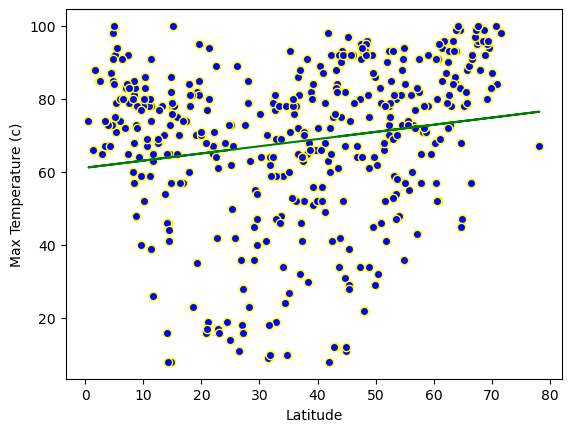

In [70]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Humidity"]
linear_reg(x_value, y_value, (13,9))

The r-value is: 0.2743085944708208


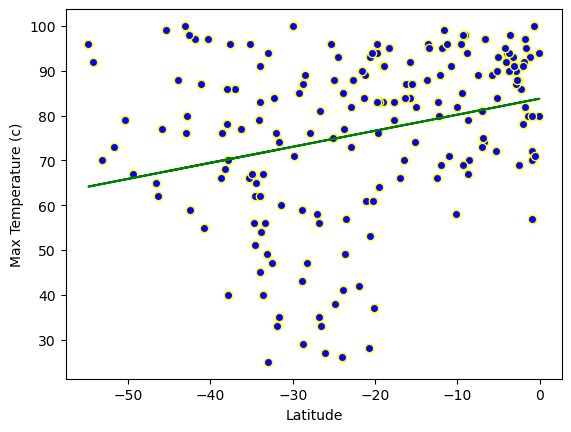

In [71]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Humidity"]
linear_reg(x_value, y_value, (-30,9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10941976190010415


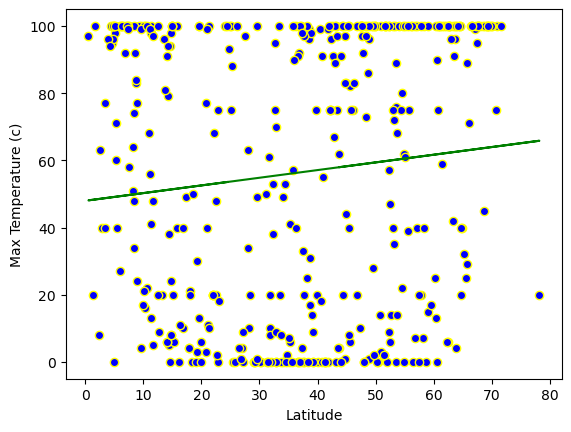

In [72]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Cloudiness"]
linear_reg(x_value, y_value, (13,9))

The r-value is: 0.12449312929566209


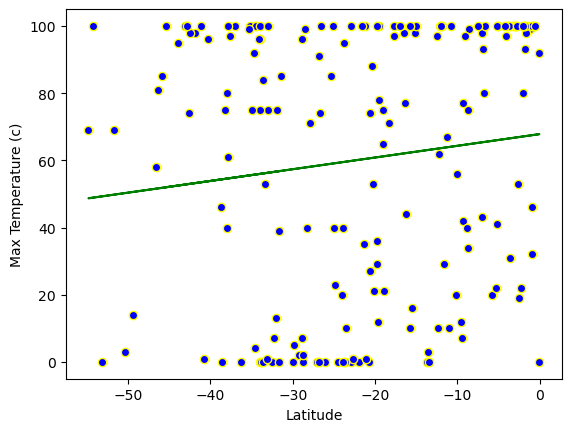

In [73]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Cloudiness"]
linear_reg(x_value, y_value, (-30,9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010316835380119809


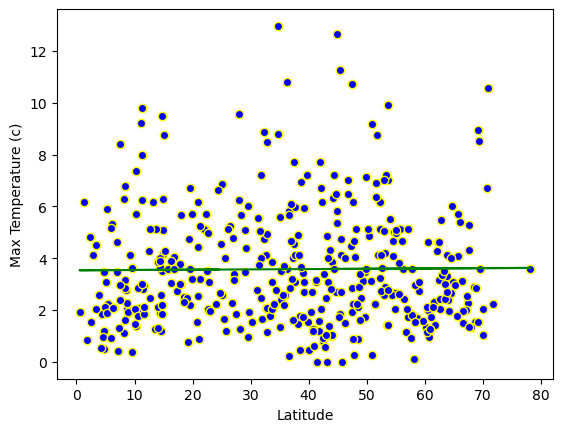

In [74]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Wind Speed"]
linear_reg(x_value, y_value, (13,9))

The r-value is: -0.26762291771438806


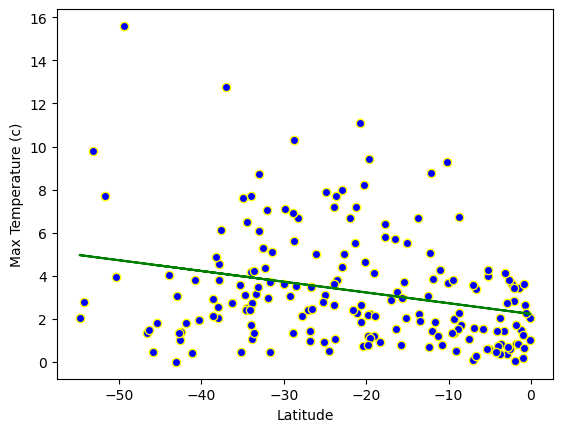

In [75]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Wind Speed"]
linear_reg(x_value, y_value, (-30,9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE